In [1]:
import sys
sys.path.append('..')
from pvdaq_query import get_pvdaq_data, make_D, plot_D

The `get_pvdaq_data` function streamlines the querying one or more years raw data from the PVDAQ service. This uses the [annual raw data file API](https://developer.nrel.gov/docs/solar/pvdaq-v3/data_file/), which is the most efficient way of accessing multi-year, sub-hourly time series data.

In [2]:
df = get_pvdaq_data(sysid=1199, api_key = 'DEMO_KEY', year=[2011, 2012, 2013])

In [3]:
df.head()

,SiteID,ac_power,dc_power,inv1_ac_power,inv1_dc_current,inv1_dc_power,inv1_dc_voltage,inv1_temp,inv2_ac_power,inv2_dc_current,...,inv6_ac_power,inv6_dc_current,inv6_dc_power,inv6_dc_voltage,inv6_temp,inv7_ac_power,inv7_dc_current,inv7_dc_power,inv7_dc_voltage,inv7_temp
2011-01-01 00:00:00,1199,0.0,0.0,0.0,0.0,0.0,262.0,19.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:05:00,1199,0.0,0.0,0.0,0.0,0.0,262.0,19.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:10:00,1199,0.0,0.0,0.0,0.0,0.0,262.0,19.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:15:00,1199,0.0,0.0,0.0,0.0,0.0,262.0,19.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:20:00,1199,0.0,0.0,0.0,0.0,0.0,262.0,19.4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


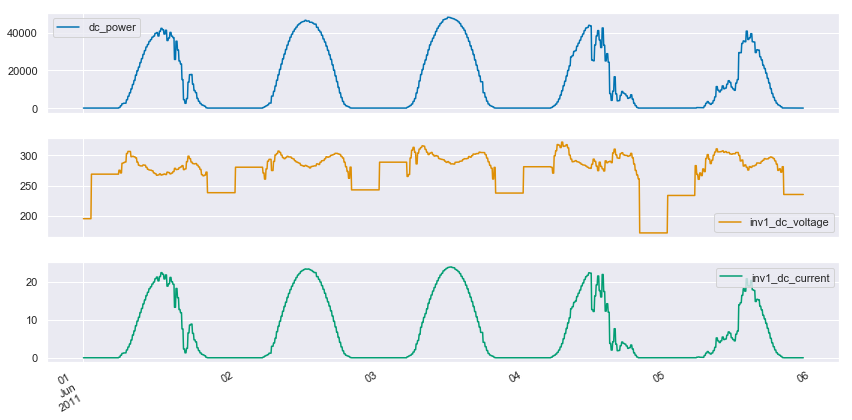

In [4]:
df.loc['2011-06-01':'2011-06-05'].plot(
    y=['dc_power', 'inv1_dc_voltage', 'inv1_dc_current'],
    subplots=True,
    figsize=(12,6)
)
plt.tight_layout()
plt.show()

The function `make_D` constructs a matrix from the power column of the data table. The 1-D time series signal is segmented into 24-hour chunks, with each segment becoming a column of the matrix. The `plot_D` function views this matrix as an image, allowing for a quick overview of the power output of the system. Below, note the large gap of missing data near the end of year 1 and the two data anomolies (nighttime power readings) in year 2.

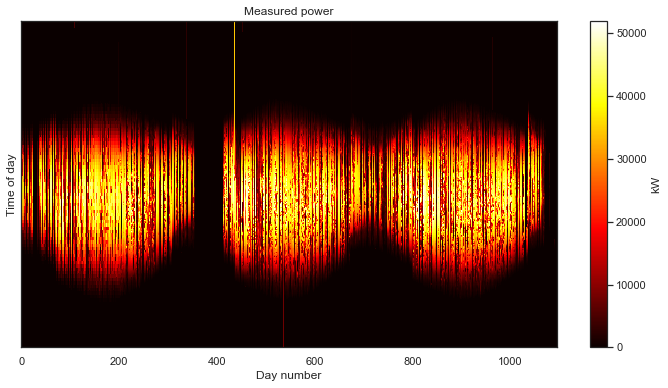

In [5]:
D = make_D(df)
_ = plot_D(D)